# Required Libraries

In [36]:
!pip install lime
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import pearsonr
import lime
from lime import lime_tabular
import time
from IPython.display import clear_output
clear_output()

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Read and Analysis

In [38]:
df_2019 = pd.read_csv('/content/drive/MyDrive/Glioma Tumor Grading/Native (T1)/DATA/BraTS2019_Features_T1.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/Glioma Tumor Grading/Native (T1)/DATA/BraTS2020_Features_T1.csv')

In [39]:
combined_df = pd.concat([df_2019,df_2020], ignore_index=True)
combined_df.head(5)

diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
0                           v3.0.1                     1.23.5   
1                           v3.0.1                     1.23.5   
2                           v3.0.1                     1.23.5   
3                           v3.0.1                     1.23.5   
4                           v3.0.1                     1.23.5   

  diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
0                          2.3.0                          1.4.1   
1                          2.3.0                          1.4.1   
2                          2.3.0                          1.4.1   
3                          2.3.0                          1.4.1   
4                          2.3.0                          1.4.1   

  diagnostics_Versions_Python  \
0                     3.10.12   
1                     3.10.12   
2                     3.10.12   
3                     3.10.12   
4                     3.10.12   

                  diagnostics_Configuration_Settings  \
0  {'minimumROIDimensions': 2, 'minimumROISize': ...   
1  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2  {'minimumROIDimensions': 2, 'minimumROISize': ...   
3  {'minimumROIDimensions': 2, 'minimumROISize': ...   
4  {'minimumROIDimensions': 2, 'minimumROISize': ...   

  diagnostics_Configuration_EnabledImageTypes  \
0                            {'Original': {}}   
1                            {'Original': {}}   
2                            {'Original': {}}   
3                            {'Original': {}}   
4                            {'Original': {}}   

            diagnostics_Image-original_Hash  \
0  33e08f677effad5e6754e93801c0729343666c94   
1  73620355b22a3b037d6fc276d63517e4eef37d70   
2  d9b9dee5c48b51d0edab0c5449bfed18b03f72e3   
3  fb07dcdfb04857334dc375bd17a2ab2d5b68d2da   
4  215b71e2f162abf87c53da2a5c4df9cba50e88f1   

  diagnostics_Image-original_Dimensionality  \
0                                        3D   
1                                        3D   
2                                        3D   
3                                        3D   
4                                        3D   

  diagnostics_Image-original_Spacing  ...  \
0                    (1.0, 1.0, 1.0)  ...   
1                    (1.0, 1.0, 1.0)  ...   
2                    (1.0, 1.0, 1.0)  ...   
3                    (1.0, 1.0, 1.0)  ...   
4                    (1.0, 1.0, 1.0)  ...   

  original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                     0.011435                    6.144567   
1                                     0.054986                    5.252435   
2                                     0.032918                    6.067100   
3                                     0.052850                    4.426734   
4                                     0.014013                    6.107923   

   original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                       0.018463                 1.617553e+05   
1                       0.008486                 1.872055e+06   
2                       0.019917                 2.249511e+05   
3                       0.087167                 9.805270e+02   
4                       0.034466                 3.988700e+04   

  original_ngtdm_Busyness original_ngtdm_Coarseness original_ngtdm_Complexity  \
0                2.252882                  0.000957                104.094198   
1               73.989228                  0.000336                  9.003672   
2                5.781757                  0.000646                 33.321381   
3                0.959756                  0.034447                  3.630403   
4               12.794691                  0.000747                 30.437174   

  original_ngtdm_Contrast  original_ngtdm_Strength  Diagnosis  
0                0.005879                 0.365346        HGG  
1                0.004367                 0.019459        HGG  
2

In [40]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 130 entries, diagnostics_Versions_PyRadiomics to Diagnosis
dtypes: float64(110), int64(2), object(18)
memory usage: 713.1+ KB


In [41]:
for column in combined_df.columns:
  print(column)

diagnostics_Versions_PyRadiomics
diagnostics_Versions_Numpy
diagnostics_Versions_SimpleITK
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Configuration_Settings
diagnostics_Configuration_EnabledImageTypes
diagnostics_Image-original_Hash
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Spacing
diagnostics_Image-original_Size
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Maximum
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_Size
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass
original_shape_Elongation
original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameterSlice
original_shape_

In [42]:
combined_df.isnull().sum()

diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
diagnostics_Versions_SimpleITK      0
diagnostics_Versions_PyWavelet      0
diagnostics_Versions_Python         0
                                   ..
original_ngtdm_Coarseness           0
original_ngtdm_Complexity           0
original_ngtdm_Contrast             0
original_ngtdm_Strength             0
Diagnosis                           0
Length: 130, dtype: int64

In [43]:
combined_df.drop(columns=["diagnostics_Versions_PyRadiomics",
                          "diagnostics_Versions_Numpy",
                          "diagnostics_Versions_SimpleITK",
                          "diagnostics_Versions_PyWavelet",
                          "diagnostics_Versions_Python",
                          "diagnostics_Configuration_Settings",
                          "diagnostics_Configuration_EnabledImageTypes",
                          "diagnostics_Image-original_Hash",
                          "diagnostics_Image-original_Minimum",
                          "diagnostics_Image-original_Dimensionality",
                          "diagnostics_Image-original_Spacing",
                          "diagnostics_Image-original_Size",
                          "diagnostics_Mask-original_Hash",
                          "diagnostics_Mask-original_Spacing",
                          "diagnostics_Mask-original_Size",
                          "diagnostics_Mask-original_BoundingBox",
                          "diagnostics_Mask-original_CenterOfMassIndex",
                          "diagnostics_Mask-original_CenterOfMass"], inplace=True, axis=1)

In [44]:
combined_df.info()
data = combined_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 112 entries, diagnostics_Image-original_Mean to Diagnosis
dtypes: float64(109), int64(2), object(1)
memory usage: 614.4+ KB


In [45]:
data

diagnostics_Image-original_Mean  diagnostics_Image-original_Maximum  \
0                          63.008830                         1043.000000   
1                          42.644644                          726.000000   
2                          46.487673                          594.000000   
3                          63.166312                         1042.000000   
4                         107.963487                         1696.000000   
..                               ...                                 ...   
697                       402.192249                         5112.000000   
698                        40.492508                          632.000000   
699                       405.593626                         4669.000000   
700                       150.078368                         2186.417236   
701                       224.888130                         2534.200439   

     diagnostics_Mask-original_VoxelNum  diagnostics_Mask-original_VolumeNum  \
0                                 27189                                  115   
1                                 45839                                  108   
2                                 34343                                   85   
3                                   413                                   18   
4                                 21122                                   95   
..                                  ...                                  ...   
697                               32310                                   20   
698                                3916                                    8   
699                                1976                                   15   
700                                1331                                   11   
701                               20589                                   24   

     original_shape_Elongation  original_shape_Flatness  \
0                     0.739545                 0.687078   
1                     0.712809                 0.693697   
2                     0.878777                 0.533268   
3                     0.770522                 0.445620   
4                     0.880661                 0.523184   
..                         ...                      ...   
697                   0.887139                 0.741028   
698                   0.566049                 0.392030   
699                   0.550380                 0.486968   
700                   0.529930                 0.405437   
701                   0.337268                 0.280098   

     original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                         30.967202                       45.070872   
1                         39.632601                       57.132479   
2                         35.224154                       66.053440   
3                          8.942993                       20.068633   
4                         26.644419                       50.927387   
..                              ...                             ...   
697                       31.829266                       42.952858   
698                       12.780029                       32.599656   
699                       13.257318                       27.224183   
700                       15.703668                       38.732714   
701                       30.337335                      108.309896   

     original_shape_Maximum2DDiameterColumn  \
0                                 57.428216   
1                                 64.884513   
2                                 65.795137   
3                                 25.553865   
4                                 53.665631   
..                                      ...   
697                               50.990195   
698                               24.186773   
699                               22.022716   
700                               36.769553   
701                               46.818800   

    

In [46]:
# data.to_csv("data.csv", index=False)

# Methodology

In [47]:
le=LabelEncoder()
y=le.fit_transform(data['Diagnosis'])

In [48]:
# Split data into features (X) and labels (y)
X = data.drop('Diagnosis', axis=1).values
# y = data['Diagnosis'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

In [50]:
num_batches = 0
for batch in train_dataset:
    num_batches += 1
    batch_size = batch[0].shape[0]  # Assuming the first element of the tuple has the shape
    print(f"Batch {num_batches}: Size {batch_size}")

print(f"Total number of batches: {num_batches}")

Batch 1: Size 64
Batch 2: Size 64
Batch 3: Size 64
Batch 4: Size 64
Batch 5: Size 64
Batch 6: Size 64
Batch 7: Size 64
Batch 8: Size 64
Batch 9: Size 49
Total number of batches: 9


In [51]:
for batch_x, batch_y in train_dataset:
    adjacency_matrix = tf.linalg.diag(tf.ones(batch_x.shape[0]))  # Identity matrix as adjacency matrix
    inputs = (batch_x, adjacency_matrix)
    print(inputs)

(<tf.Tensor: shape=(64, 111), dtype=float64, numpy=
array([[-0.34050251, -0.32806773, -0.74132043, ..., -0.10125091,
        -0.06985558, -0.16598147],
       [-0.14684652, -0.16537194, -0.35171362, ..., -0.09610565,
        -0.05152173, -0.16230782],
       [-0.04346123, -0.0573526 ,  2.46457823, ..., -0.07971168,
        -0.24298386, -0.16984247],
       ...,
       [-0.28573062, -0.30246315, -0.68392879, ..., -0.10054315,
        -0.31735733, -0.13341893],
       [-0.29455285, -0.29499514,  0.11237584, ..., -0.10008618,
        -0.3627489 , -0.18766062],
       [-0.24640745, -0.30513029, -0.33004221, ..., -0.10038973,
         0.09025355, -0.18545224]])>, <tf.Tensor: shape=(64, 64), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>)
(<tf.Tensor: shape=(64, 1

In [52]:
for batch_x, batch_y in train_dataset:
    # print(batch_x.shape)  # (64, 112)
    # print(tf.linalg.diag(tf.ones(batch_x.shape[0])))  # shape=(64, 64)
    inputs = (batch_x, tf.linalg.diag(tf.ones(batch_x.shape[0])))  # Identity matrix as adjacency matrix

In [53]:
class GraphConvolution(tf.keras.layers.Layer):
    def __init__(self, units, activation=None):
        super(GraphConvolution, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(name="kernel",
                                      shape=[input_shape[0][-1], self.units],
                                      initializer="glorot_uniform",
                                      trainable=True)

    def call(self, inputs):
        x, adj_matrix = inputs
        x = tf.matmul(adj_matrix, x)
        output = tf.matmul(x, self.kernel)
        if self.activation is not None:
            output = self.activation(output)
        return output

In [68]:
class RGNN(tf.keras.Model):
    def __init__(self, num_classes):
        super(RGNN, self).__init__()
        self.num_classes = num_classes
        self.gcn1 = GraphConvolution(32, activation='leaky_relu')
        self.lstm = tf.keras.layers.LSTM(32)  # Adding an LSTM layer
        self.gcn2 = GraphConvolution(32, activation='leaky_relu')
        self.gcn3 = GraphConvolution(16, activation='leaky_relu')
        self.dense4 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        x, adj_matrix = inputs  # x=(64, 112), adj_matrix=(64, 64)
        h = self.gcn1([x, adj_matrix])  # (64, 32)
        h = tf.expand_dims(h, axis=1)  # (64, 1, 32)
        h = self.lstm(h)    # (64, 64)
        h = self.gcn2([h, adj_matrix])  # (64, 32)
        h = self.gcn3([h, adj_matrix])  # (64, 16)
        h = self.dense4(h)  # (64, num_classes)
        return h

# Create the RGNN model
num_classes = 2  # Two classes: 0 and 1
model = RGNN(num_classes)

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

In [55]:
@tf.function
def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

@tf.function
def val_step(inputs, labels):
    predictions = model(inputs, training=False)
    t_loss = loss_object(labels, predictions)
    return t_loss, predictions

In [56]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epoch_times = []


# Training loop
epochs = 50
for epoch in range(epochs):
    start_time = time.time()  # ⏱️ Start timer
    # Reset the metrics at the start of the next epoch
    train_acc_metric.reset_state()
    val_acc_metric.reset_state()

    # Training loop
    for batch_x, batch_y in train_dataset:
        inputs = (batch_x, tf.linalg.diag(tf.ones(batch_x.shape[0])))  # Identity matrix as adjacency matrix
        loss = train_step(inputs, batch_y)
        train_acc_metric.update_state(batch_y, model(inputs, training=False))

    train_losses.append(loss.numpy())
    train_accuracies.append(train_acc_metric.result().numpy())

    # Validation loop
    for val_batch_x, val_batch_y in test_dataset:
        val_inputs = (val_batch_x, tf.linalg.diag(tf.ones(val_batch_x.shape[0])))
        val_loss, val_predictions = val_step(val_inputs, val_batch_y)
        val_acc_metric.update_state(val_batch_y, val_predictions)

    val_losses.append(val_loss.numpy())
    val_accuracies.append(val_acc_metric.result().numpy())

    epoch_time = time.time() - start_time  # ⏱️ End timer
    epoch_times.append(epoch_time)

    print(f"Epoch {epoch + 1}/{epochs}, "
          f"Loss: {loss.numpy()}, "
          f"Accuracy: {train_acc_metric.result().numpy()}, "
          f"Val Loss: {val_loss.numpy()}, "
          f"Val Accuracy: {val_acc_metric.result().numpy()}, "
          f"Time: {epoch_time:.2f} sec")

# ✅ After training
average_epoch_time = sum(epoch_times) / len(epoch_times)
print(f"\n✅ Average time per epoch: {average_epoch_time:.2f} seconds")

Epoch 1/50, Loss: 0.665977954864502, Accuracy: 0.6399286985397339, Val Loss: 0.6531358361244202, Val Accuracy: 0.8085106611251831, Time: 10.80 sec
Epoch 2/50, Loss: 0.6033658981323242, Accuracy: 0.8449198007583618, Val Loss: 0.5815871953964233, Val Accuracy: 0.8581560254096985, Time: 0.68 sec
Epoch 3/50, Loss: 0.5329735279083252, Accuracy: 0.855614960193634, Val Loss: 0.49248841404914856, Val Accuracy: 0.8652482032775879, Time: 0.44 sec
Epoch 4/50, Loss: 0.47686880826950073, Accuracy: 0.8502673506736755, Val Loss: 0.38689497113227844, Val Accuracy: 0.8723404407501221, Time: 0.70 sec
Epoch 5/50, Loss: 0.41558682918548584, Accuracy: 0.8520498871803284, Val Loss: 0.2808851897716522, Val Accuracy: 0.8723404407501221, Time: 0.69 sec
Epoch 6/50, Loss: 0.4246995747089386, Accuracy: 0.8734402656555176, Val Loss: 0.21284788846969604, Val Accuracy: 0.9078013896942139, Time: 0.78 sec
Epoch 7/50, Loss: 0.3591447174549103, Accuracy: 0.8823529481887817, Val Loss: 0.19394922256469727, Val Accuracy: 0

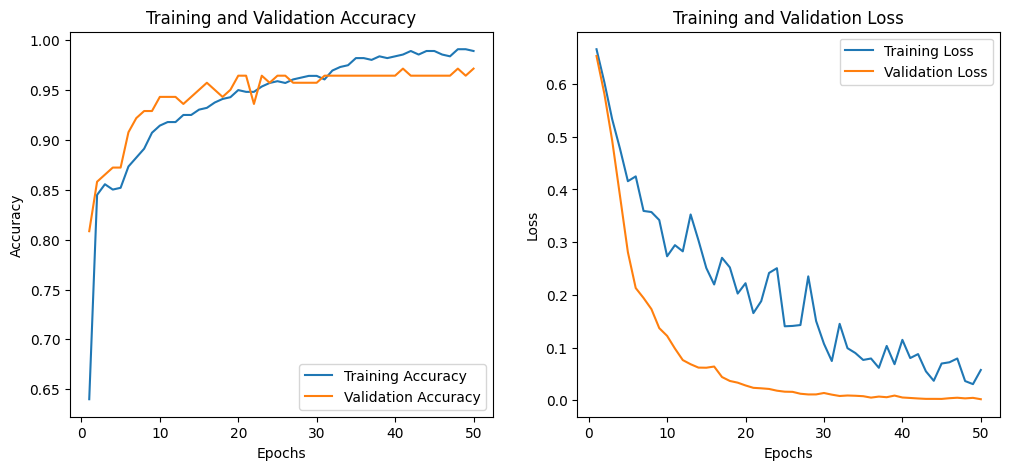

In [57]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('accuracy&loss_curve.pdf', format='pdf')
plt.show()

# **Model Interpretability Analysis (LIME)**

In [58]:
def predict_fn(data):
    adj_matrix = tf.linalg.diag(tf.ones(data.shape[0]))
    inputs = (data, adj_matrix)
    predictions = model(inputs, training=False)
    return predictions.numpy()

# Initialize LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=data.columns[:-1],
    class_names=le.classes_,
    mode='classification'
)

instance_idx = 2  # Change this to the index of the different data points
instance = X_test[instance_idx]

# Generate explanation
exp = explainer.explain_instance(instance, predict_fn, num_features=10)

# Display explanation
exp.show_in_notebook(show_all=False)
# Save the explanation as an HTML file
temp_html_path = 'lime_explanation.html'
exp.save_to_file(temp_html_path)

In [59]:
def predict_fn(data):
    adj_matrix = tf.linalg.diag(tf.ones(data.shape[0]))
    inputs = (data, adj_matrix)
    predictions = model(inputs, training=False)
    return predictions.numpy()

# Initialize LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=data.columns[:-1],
    class_names=le.classes_,
    mode='classification'
)

instance_idx = 10  # Change this to the index of the different data points
instance = X_test[instance_idx]

# Generate explanation
exp = explainer.explain_instance(instance, predict_fn, num_features=10)

# Display explanation
exp.show_in_notebook(show_all=False)
temp_html_path = 'lime_explanation.html'
exp.save_to_file(temp_html_path)

# Result Evaluation

In [60]:
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
for batch_x, batch_y in test_dataset:
    inputs = (batch_x, tf.linalg.diag(tf.ones(batch_x.shape[0])))
    predictions = model(inputs, training=False)
    test_accuracy(batch_y, predictions)

print(f'Test Accuracy: {test_accuracy.result():.2f}')

Test Accuracy: 0.97


In [61]:
y_pred = []
for batch_x, _ in test_dataset:
    inputs = (batch_x, tf.linalg.diag(tf.ones(batch_x.shape[0])))
    predictions = model(inputs, training=False)
    y_pred.extend(predictions.numpy().argmax(axis=1))

y_test = np.array(y_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[110   1]
 [  3  27]]


In [62]:
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
specificity = TN / (TN + FP)
print("Specificity:", specificity)

Specificity: 0.990990990990991


In [63]:
auc_score = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc_score:.2f}')

AUC Score: 0.95


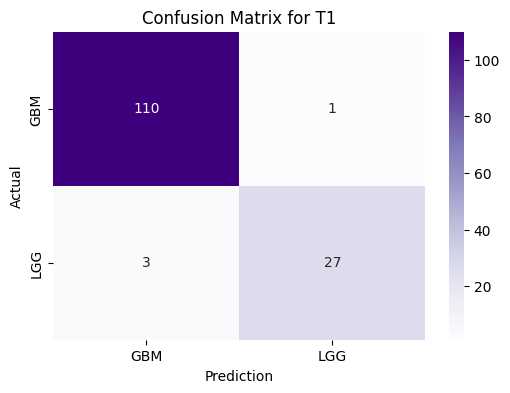

In [64]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=True,
            xticklabels=['GBM', 'LGG'],
            yticklabels=['GBM', 'LGG'])

# Set plot labels and title
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for T1')

# Save the plot as a PDF file
plt.savefig('confusion_matrix_t1.pdf', format='pdf')

# Display the plot
plt.show()

In [65]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       111
           1       0.96      0.90      0.93        30

    accuracy                           0.97       141
   macro avg       0.97      0.95      0.96       141
weighted avg       0.97      0.97      0.97       141



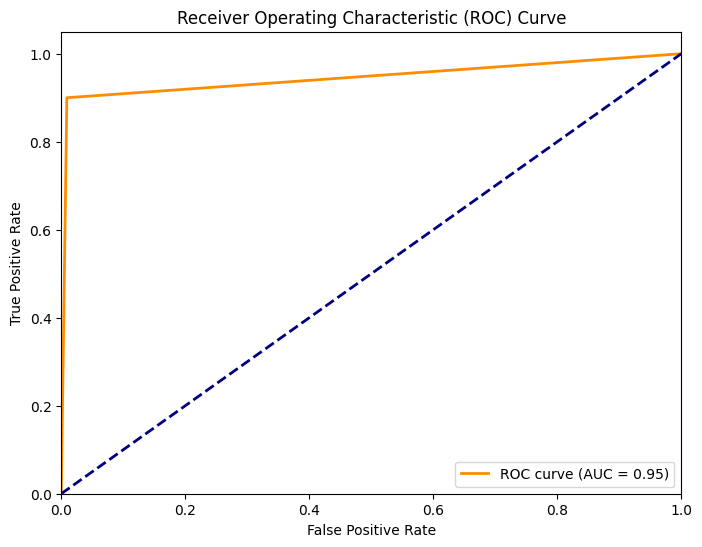

In [66]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Create and display the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()